### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

import pickle

### Load Dataset

In [2]:
# Load dataset
file_path = '../content/heart.csv'
heart_data = pd.read_csv(file_path)

### Preprocessing Data

In [3]:
# Display dataset info and first few rows
heart_data_info = heart_data.info()
heart_data_head = heart_data.head()

heart_data_info, heart_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  )

Dataset berisi 303 entri dengan 14 kolom, tanpa nilai yang hilang. Berikut adalah kolom-kolomnya:

- age: Umur pasien
- sex: Jenis kelamin (1 = laki-laki, 0 = perempuan)
- cp: Jenis nyeri dada (kategori)
- trestbps: Tekanan darah istirahat (mm Hg)
- chol: Kolesterol serum (mg/dl)
- fbs: Gula darah puasa > 120 mg/dl (1 = benar, 0 = salah)
- restecg: Hasil elektrokardiografi istirahat
- thalach: Denyut jantung maksimum
- exang: Angina akibat olahraga (1 = ya, 0 = tidak)
- oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- slope: Kemiringan segmen ST olahraga
- ca: Jumlah pembuluh darah besar yang diwarnai fluoroskopi (0–3)
- thal: Kondisi thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)
- target: 1 = Penyakit jantung, 0 = Tidak ada penyakit

In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numeric and categorical columns
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [5]:
# Normalizing numeric columns
scaler = StandardScaler()
heart_data[numeric_columns] = scaler.fit_transform(heart_data[numeric_columns])

In [6]:
# Ensuring categorical columns are encoded as integers
heart_data[categorical_columns] = heart_data[categorical_columns].astype('int')

# Check the processed data
processed_data_head = heart_data.head()
processed_data_head

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


- Kolom numerik telah dinormalisasi menggunakan StandardScaler untuk menjaga keseimbangan skala data.
- Kolom kategori dipastikan bertipe integer.

### Exploratory Data Analysis (EDA)

<ipython-input-7-1197b44d9cc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='viridis')


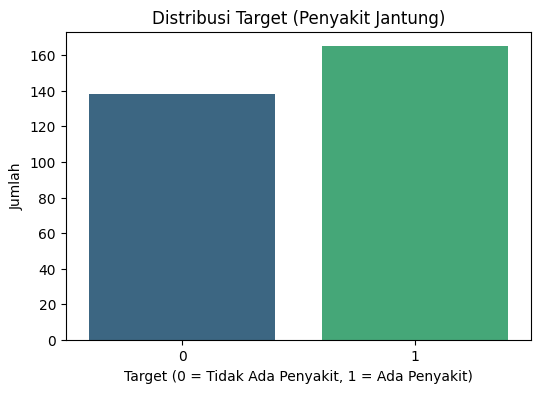

In [7]:
# Visualize target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data, palette='viridis')
plt.title('Distribusi Target (Penyakit Jantung)')
plt.xlabel('Target (0 = Tidak Ada Penyakit, 1 = Ada Penyakit)')
plt.ylabel('Jumlah')
plt.show()

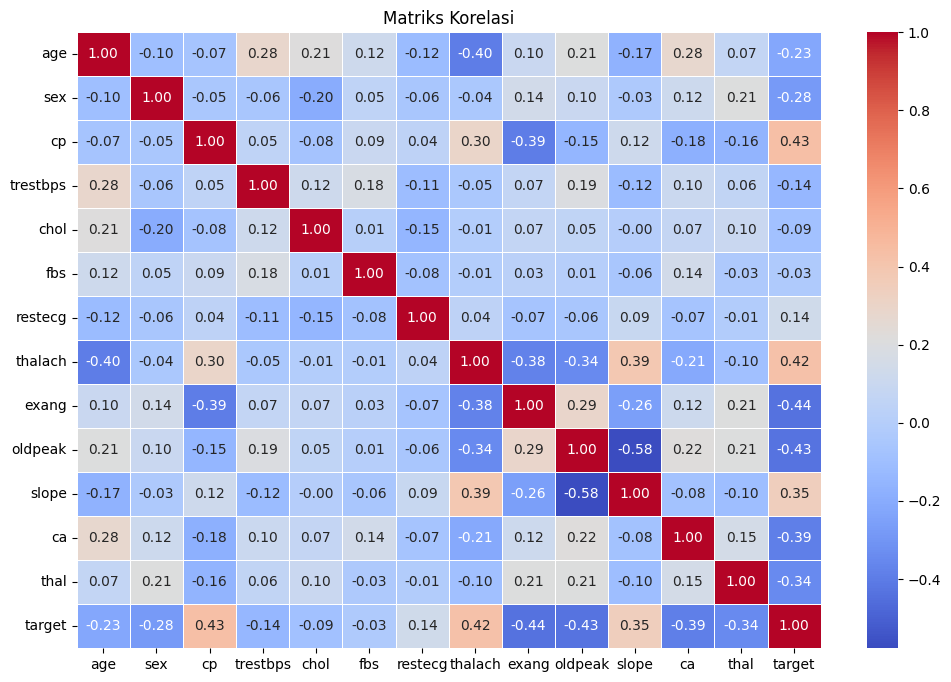

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

Hasil Exploratory Data Analysis (EDA):

Distribusi Target:

- Ada distribusi yang relatif seimbang antara pasien dengan dan tanpa penyakit jantung (target 0 dan 1). Ini penting untuk memastikan performa model tidak bias terhadap salah satu kelas.
Matriks Korelasi:

- Fitur seperti cp (jenis nyeri dada), thalach (denyut jantung maksimum), dan oldpeak memiliki korelasi kuat dengan target.
Sebaliknya, beberapa fitur seperti chol (kolesterol) dan trestbps (tekanan darah) memiliki korelasi lemah terhadap target.

### Feature Selection

In [9]:
# Define features and target
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=8)  # Choose top 8 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Hasil seleksi fitur menggunakan metode SelectKBest dengan ANOVA F-test menunjukkan bahwa delapan fitur terpenting yang paling relevan terhadap target adalah sex, cp (jenis nyeri dada), thalach (denyut jantung maksimum), exang (angina akibat olahraga), oldpeak (depresi ST), slope (kemiringan segmen ST olahraga), ca (jumlah pembuluh darah besar), dan thal (kondisi thalassemia). Fitur-fitur ini memiliki nilai F-Score dan signifikansi statistik (p-value) yang menunjukkan hubungan kuat dengan kemungkinan terjadinya penyakit jantung. Seleksi ini membantu menyederhanakan kompleksitas model tanpa mengorbankan informasi penting, sehingga meningkatkan efisiensi dan akurasi proses klasifikasi.

### Modelling

In [11]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Evaluation Model

In [13]:
# Predictions and Evaluation
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Evaluation metrics for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"Random Forest ROC-AUC: {rf_auc:.4f}")

# Evaluation metrics for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f"Logistic Regression ROC-AUC: {lr_auc:.4f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Random Forest ROC-AUC: 0.9246

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Logistic Regression ROC-AUC: 0.9106


In [14]:
# Save the models
with open('random_forest_model.pkl', 'wb') as rf_file:
    pickle.dump(rf_model, rf_file)

with open('logistic_regression_model.pkl', 'wb') as lr_file:
    pickle.dump(lr_model, lr_file)

print("Models saved as 'random_forest_model.pkl' and 'logistic_regression_model.pkl'.")

Models saved as 'random_forest_model.pkl' and 'logistic_regression_model.pkl'.


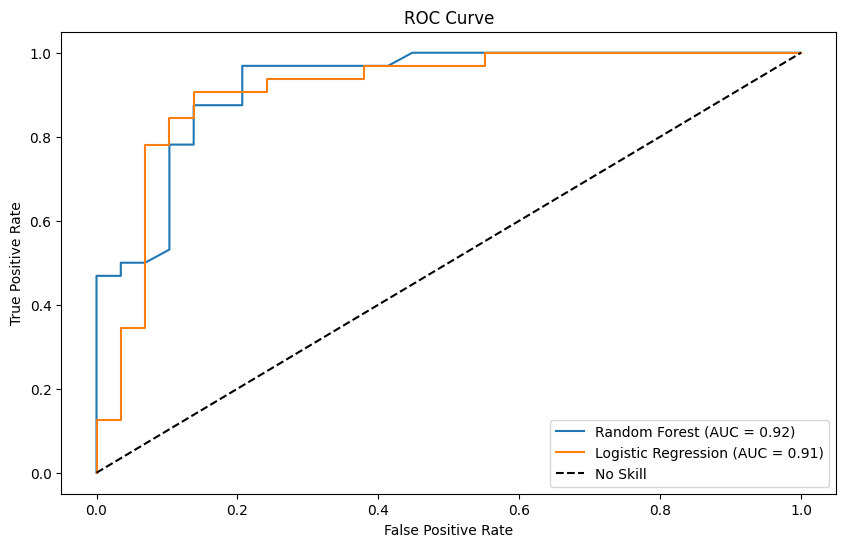

In [15]:
# Visualize ROC Curve
import matplotlib.pyplot as plt

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Pada evaluasi model, Logistic Regression menunjukkan akurasi yang lebih tinggi (87%) dibandingkan Random Forest (84%), dengan f1-score yang lebih konsisten pada kedua kelas. Namun, Random Forest memiliki nilai ROC-AUC lebih baik (0.9246 vs. 0.9106), menunjukkan kemampuan pemisahan probabilitas yang sedikit lebih unggul. Logistic Regression cocok untuk model yang sederhana dan mudah diinterpretasi, sementara Random Forest lebih efektif dalam menangani data yang kompleks dengan hubungan fitur yang tidak linear. Pemilihan model tergantung pada prioritas antara interpretabilitas dan performa pemisahan probabilitas.